In [1]:
import itertools
import pandas as pd

data = pd.read_csv('./per_step_delay.csv')
# models = pd.CategoricalDtype(["curve-low", "curve-high", "legacy", "first-order", "first-order-median"], ordered=False)
# data["model"] = data["model"].astype(models)
# data = data[data["rho"] < 0.6]
# data = data[data["sigma"] < 3.2]

rho_scale_dtype = pd.CategoricalDtype(map(lambda t: f"{t[0]} {t[1]}", itertools.product(sorted(data["rho"].unique()), sorted(data["scale"].unique()))), ordered=True)

data["rho"] = data["rho"].astype("category")
data["scale"] = data["scale"].astype("category")


data["rho_scale"] = data[["rho", "scale"]].apply(func=lambda row: f"{row.rho} {row.scale}", axis=1).astype(rho_scale_dtype)
data["model"] = data["model"].replace({
    "first-order": "Ref. Stochastic",
    "first-order-median": "Ref. Median",
    "3rd-poly-low": "3rd Order Poly. (low neuroticism)",
    "3rd-poly-high": "3rd Order Poly. (high neuroticism)",
    "legacy": "Legacy EdgeDroid 1.0"
}).astype("category")

data

,step_number,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,model,rep,s_param,rho,scale,rho_scale
0,0,0.379709,0.000000,0.379709,0.379709,0.000000,1,3rd Order Poly. (high neuroticism),0,1.2,0.0,0.4,0.0 0.4
1,1,0.254980,5.088823,5.354576,0.265753,0.010773,21,3rd Order Poly. (high neuroticism),0,1.2,0.0,0.4,0.0 0.4
2,2,0.225312,5.050452,5.407490,0.357038,0.131726,24,3rd Order Poly. (high neuroticism),0,1.2,0.0,0.4,0.0 0.4
3,3,0.480440,5.081516,5.765285,0.683769,0.203329,12,3rd Order Poly. (high neuroticism),0,1.2,0.0,0.4,0.0 0.4
4,4,1.258972,4.861119,6.294861,1.433742,0.174770,5,3rd Order Poly. (high neuroticism),0,1.2,0.0,0.4,0.0 0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,46,0.346282,5.230947,5.886789,0.655842,0.309560,17,Ref. Median,29,1.2,0.5,3.2,0.5 3.2
214196,47,0.528507,5.230947,5.813574,0.582627,0.054120,11,Ref. Median,29,1.2,0.5,3.2,0.5 3.2
214197,48,7.350258,5.230947,14.700516,9.469569,2.119311,2,Ref. Median,29,1.2,0.5,3.2,0.5 3.2
214198,49,20.980018,5.230947,41.960035,36.729088,15.749071,2,Ref. Median,29,1.2,0.5,3.2,0.5 3.2


In [2]:
total_durations = data.groupby(["model", "rep", "rho", "scale", "rho_scale"], observed=True)["step_duration"].sum().reset_index()
total_durations

,model,rep,rho,scale,rho_scale,step_duration
0,3rd Order Poly. (high neuroticism),0,0.0,0.05,0.0 0.05,207.904404
1,3rd Order Poly. (high neuroticism),0,0.0,0.10,0.0 0.1,231.685598
2,3rd Order Poly. (high neuroticism),0,0.0,0.20,0.0 0.2,271.642743
3,3rd Order Poly. (high neuroticism),0,0.0,0.40,0.0 0.4,314.307277
4,3rd Order Poly. (high neuroticism),0,0.0,0.80,0.0 0.8,370.563679
...,...,...,...,...,...,...
4195,Ref. Stochastic,29,0.5,0.20,0.5 0.2,355.882122
4196,Ref. Stochastic,29,0.5,0.40,0.5 0.4,352.292671
4197,Ref. Stochastic,29,0.5,0.80,0.5 0.8,479.877972
4198,Ref. Stochastic,29,0.5,1.60,0.5 1.6,631.197174


mean duration


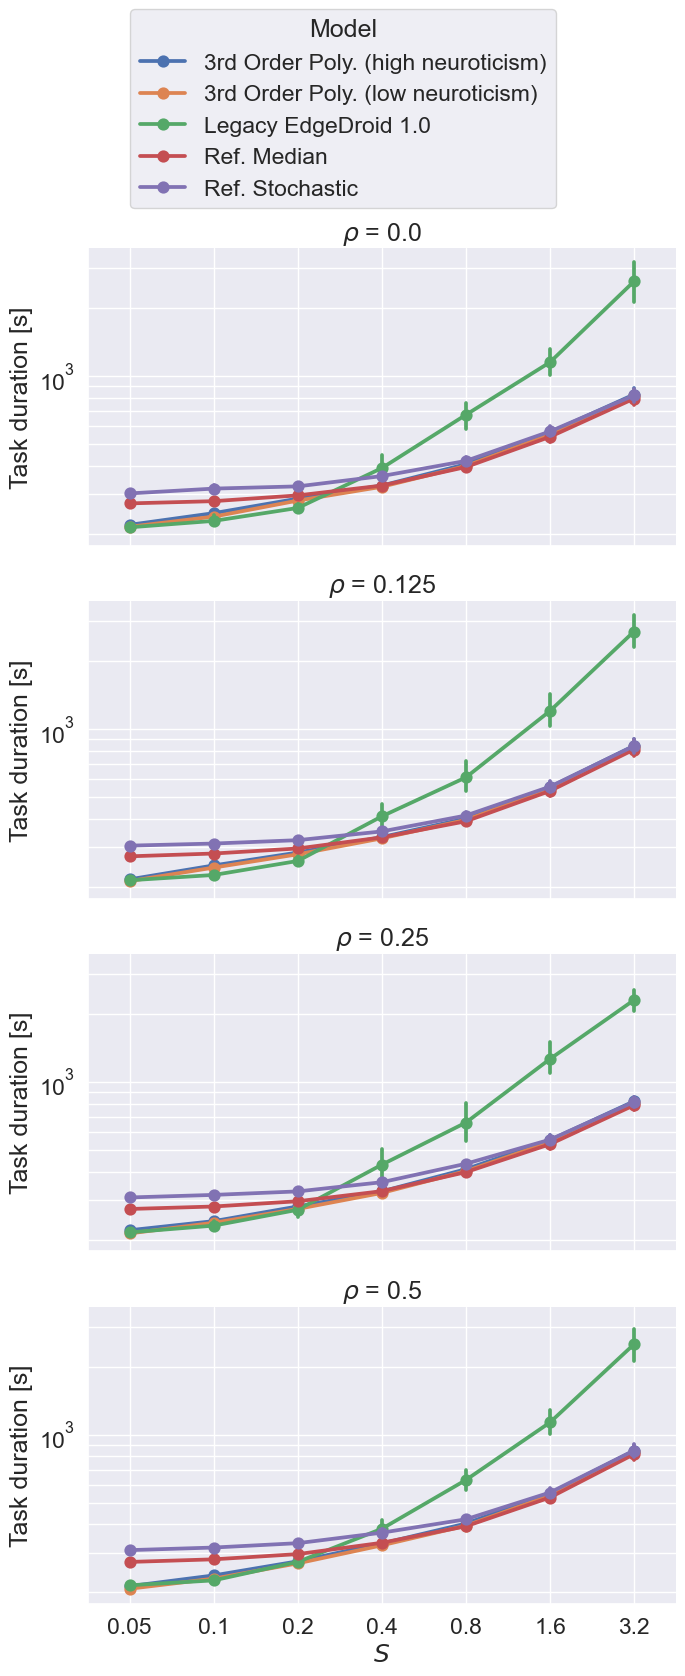

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set(font_scale=1.5)
DOUBLE_COL_FIGW = 7.16

print("mean duration")
fg = sns.catplot(kind="point", data=total_durations, hue="model", y="step_duration", x="scale", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"$S$", "Task duration [s]")
fg.set_titles(row_template=r"$\rho$ = {row_name}")
# fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)
    
fg.set(yscale="log")

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*7.5))
fg.tight_layout()
plt.show()

# push correlation higher

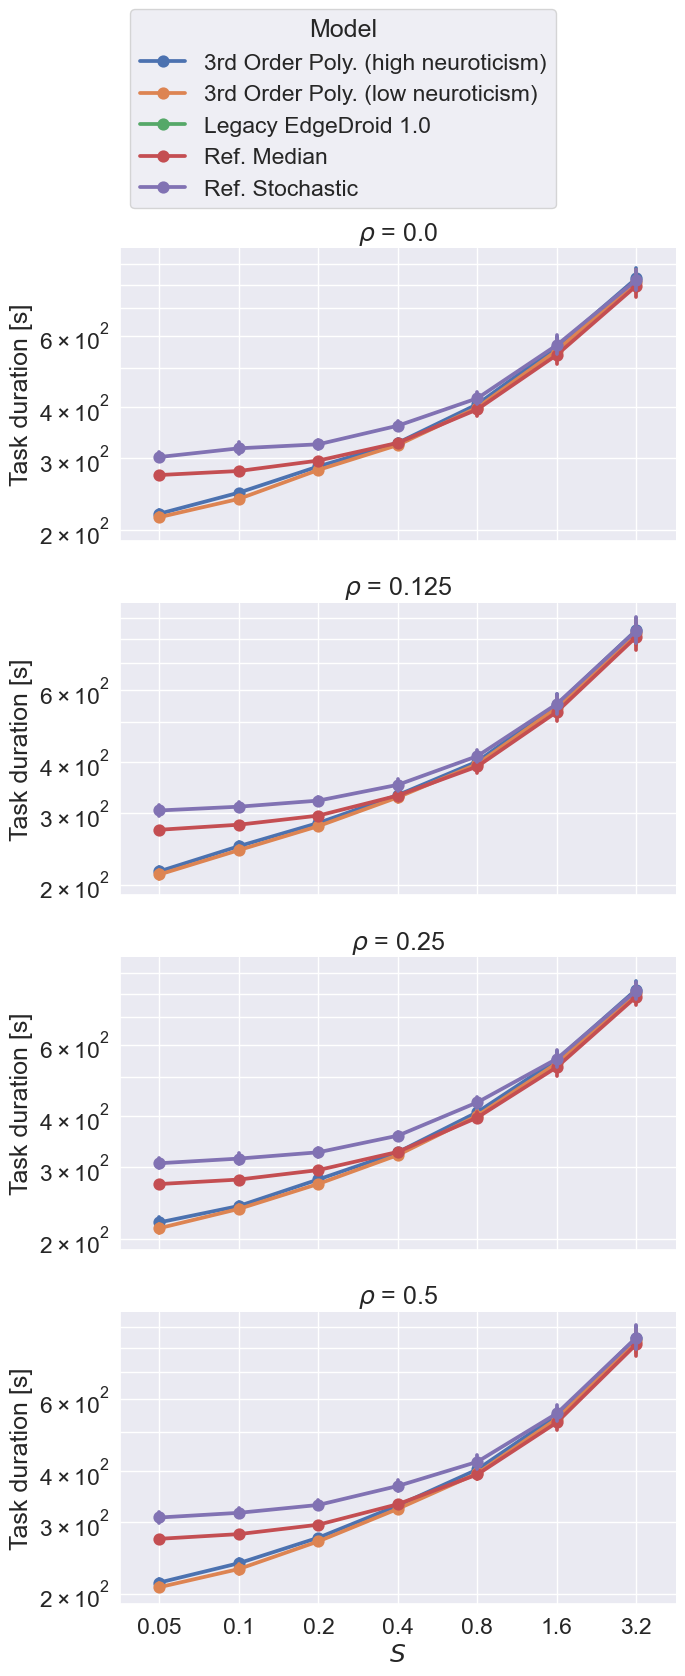

In [4]:
fg = sns.catplot(kind="point", data=total_durations[total_durations["model"] != "Legacy EdgeDroid 1.0"], hue="model", y="step_duration", x="scale", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"$S$", "Task duration [s]")
fg.set_titles(row_template=r"$\rho$ = {row_name}")
# fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)

fg.set(yscale="log")

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*7.5))
fg.tight_layout()
plt.show()

In [5]:
mean_total_durations = (
    total_durations
    .groupby(["model", "rho", "scale"])["step_duration"]
    .mean()
    .reset_index()
)

min_scale = mean_total_durations[mean_total_durations.scale == mean_total_durations.scale.astype(float).min()].drop(columns=["scale"]).set_index(["model", "rho"])["step_duration"].astype(float)
max_scale = mean_total_durations[mean_total_durations.scale == mean_total_durations.scale.astype(float).max()].drop(columns=["scale"]).set_index(["model", "rho"])["step_duration"].astype(float)

((max_scale - min_scale) / min_scale).sort_values(ascending=False)

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_21128/3797164928.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["model", "rho", "scale"])["step_duration"]


model                               rho  
Legacy EdgeDroid 1.0                0.125    11.653111
                                    0.000    11.287596
                                    0.500    10.692474
                                    0.250     9.697121
3rd Order Poly. (low neuroticism)   0.500     3.015958
3rd Order Poly. (high neuroticism)  0.500     2.983855
3rd Order Poly. (low neuroticism)   0.125     2.912037
3rd Order Poly. (high neuroticism)  0.125     2.905220
3rd Order Poly. (low neuroticism)   0.000     2.786433
                                    0.250     2.783943
3rd Order Poly. (high neuroticism)  0.000     2.778686
                                    0.250     2.725395
Ref. Median                         0.500     2.001498
                                    0.125     1.972941
                                    0.000     1.912079
                                    0.250     1.881634
Ref. Stochastic                     0.125     1.763105
                       

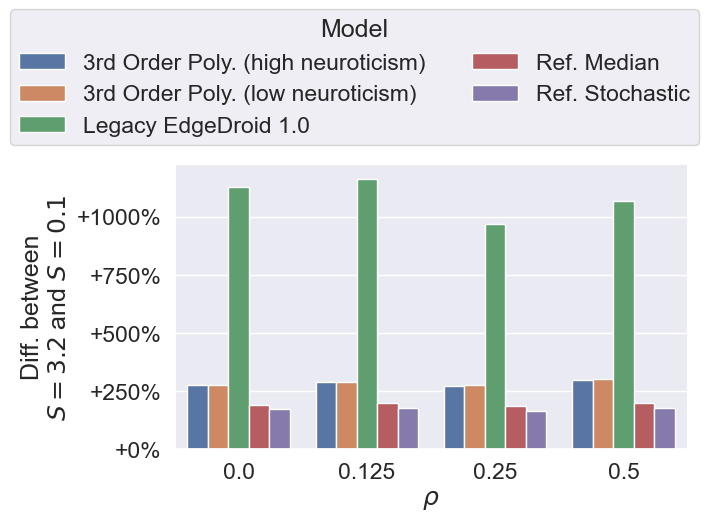

In [6]:
sns.set_context("paper")
sns.set(font_scale=1.5)

duration_increase = ((max_scale - min_scale) / min_scale).reset_index()
fg = sns.catplot(kind="bar", data=duration_increase, x="rho", hue="model", y="step_duration", legend_out=False)
fg.set_axis_labels(r"$\rho$", "Diff. between\n" r"$S = 3.2$ and $S = 0.1$")

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter("{x:+.0%}")

sns.move_legend(fg, "upper center", title="Model", bbox_to_anchor=(.5, 1.35), ncols=2)
fg.figure.set_size_inches((2*3.6, 2*2))
fg.tight_layout()
plt.show()

mean number of frames


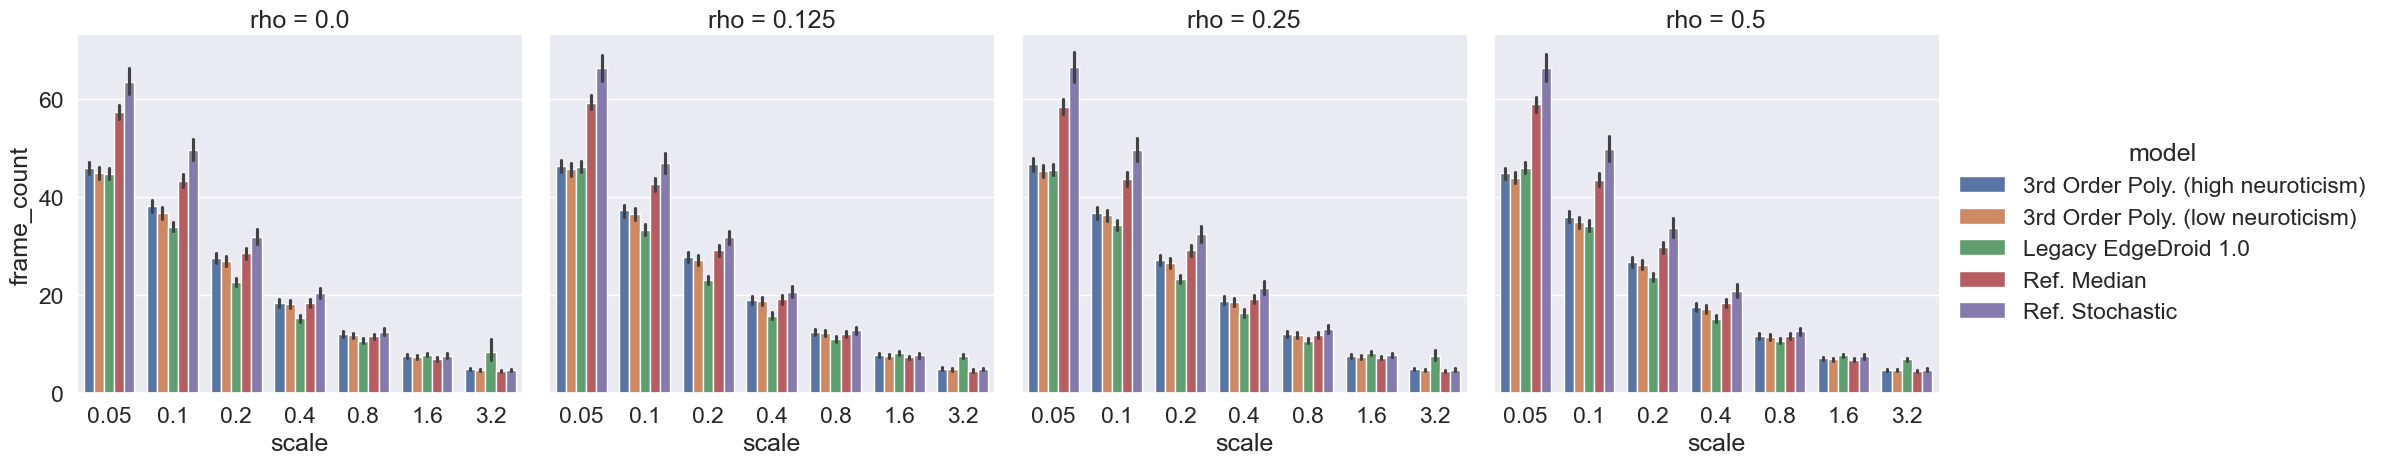

In [7]:
print("mean number of frames")
fg = sns.catplot(kind="bar", data=data, y="frame_count", hue="model", x="scale", col="rho")
plt.show()

mean TTF


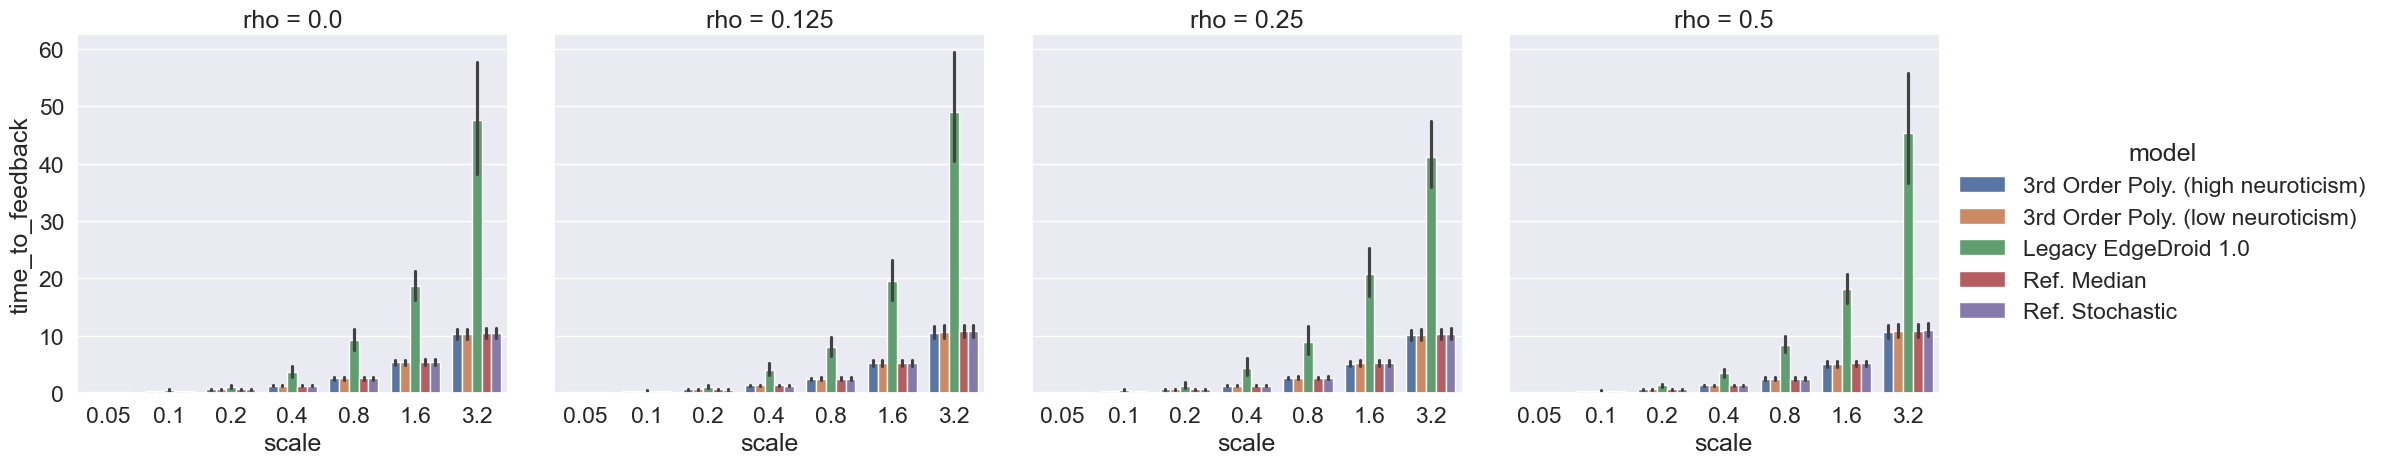

In [8]:
print("mean TTF")
fg = sns.catplot(kind="bar", data=data, hue="model", y="time_to_feedback", x="scale", col="rho")
plt.show()

mean wait time


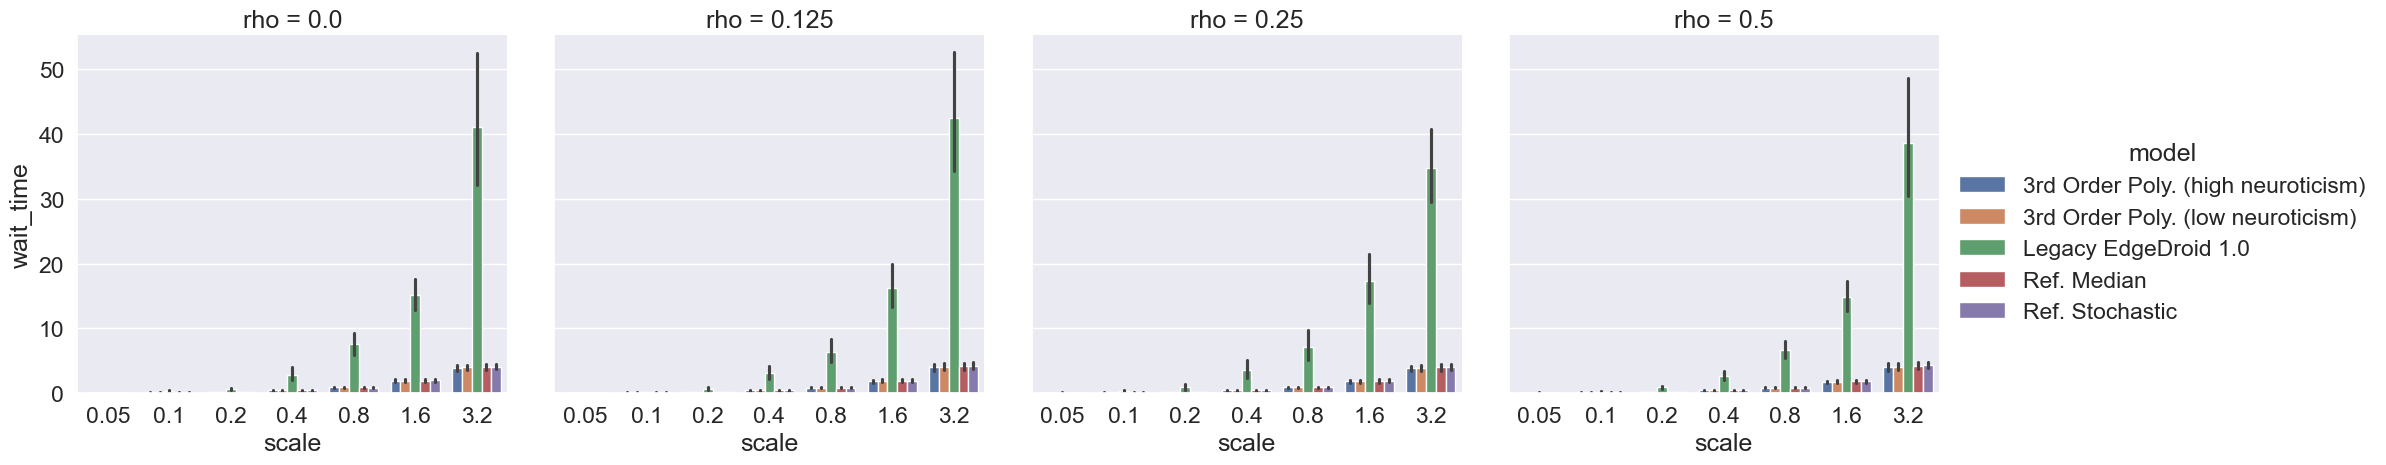

In [9]:
print("mean wait time")
fg = sns.catplot(kind="bar", data=data, hue="model", y="wait_time", x="scale", col="rho")
plt.show()

mean last frame rtt


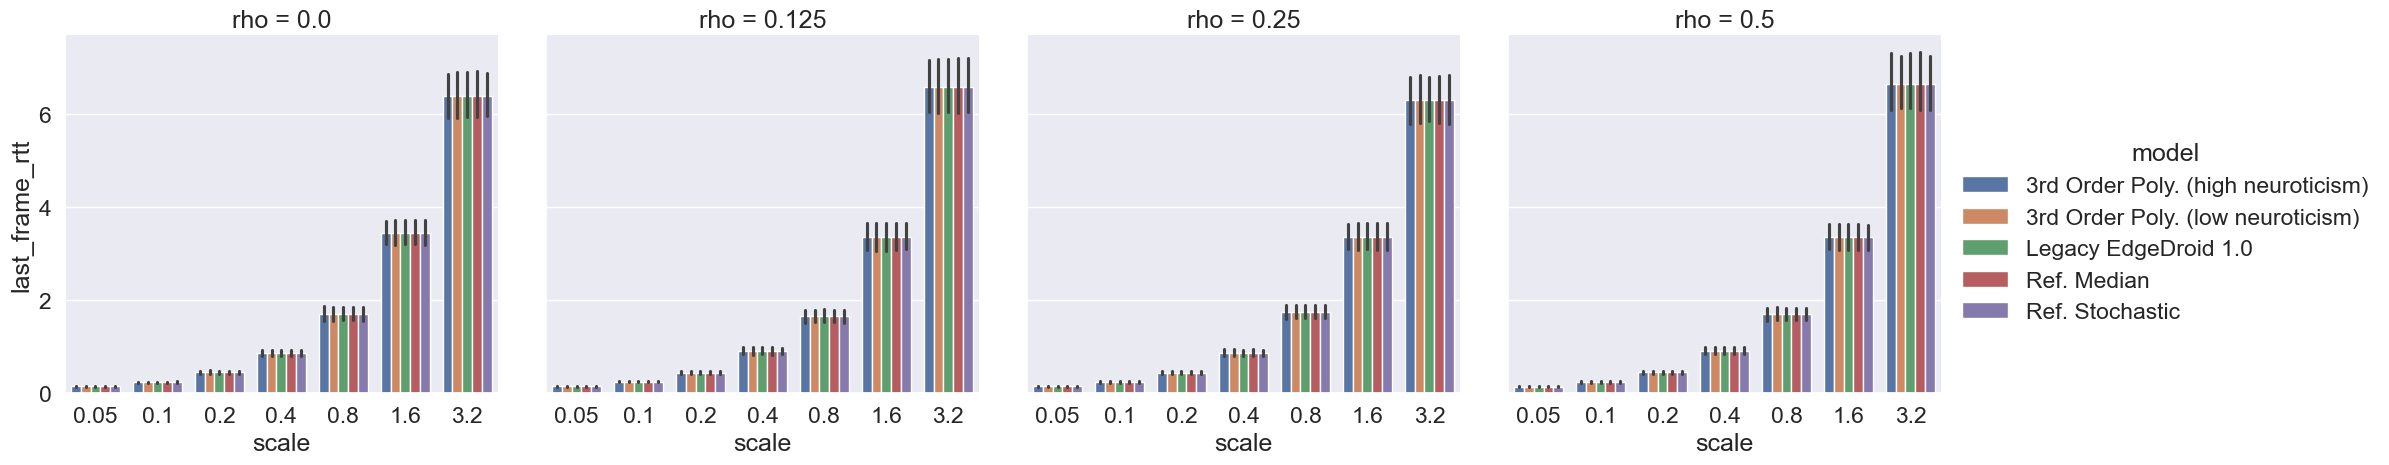

In [10]:
print("mean last frame rtt")
fg = sns.catplot(kind="bar", data=data, hue="model", y="last_frame_rtt", x="scale", col="rho")
plt.show()

In [11]:
data["rep"].max()

29